# HW 13

### **CHOOSE ONE** of the following 2 options:
* ### Flavors of Cacao
* ### NBA Stats

In [448]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Option 1: Flavors of Cacao
**Upload 2 files** to Gradescope:
* `HW13choc.py`
* `HW13choc.ipynb`

**Read in the file** `'chocolate.csv'` as a pandas dataframe called `dfchoc`. The file, downloaded from flavorsofcacao.com, contains information and ratings for 2400+ dark chocolate bars, 2006 to July 2021.

* **REF**: Reference number
* **Company**: Manufacturer
* **Location**: Manufacturer Location
* **Review_Date**: Year
* **Country_of_Bean_Origin** 
* **Specific_Bean_Origin** or Bar Name
* **Cocoa_Pct** 
* **Ingredients**: Number of ingredients followed by B = Beans, S = Sugar, S* = Other Sweetener, C = Cocoa Butter, V = Vanilla, L = Lecithin, Sa = Salt
* **Characteristics**: A comma-delimited list of adjectives such as "cocoa, blackberry, full body".
* **Rating:** Scale of 1 (lowest) to 4 (highest)

In [451]:
dfchoc = pd.read_csv('chocolate.csv')

### Identifying Missing Data
There is one entry in the dataframe that is blank. It is in the `Bean_Origin` column. **Drop the row with the missing entry** from `dfchoc`.

In [453]:
dfchoc = dfchoc.dropna(subset=['Bean_Origin'])

### Which Countries' Beans Are Used Most Often?

Write a function **origin_most_bars(dfchoc, nmost)** that returns a list of the `nmost` countries in the `Bean_Origin` column with the most number of bars, ordered from the most bars to the least. If `nmost` is omitted, the default value is 5.

Example:  `country_most(dfchoc, 3)` returns `['Venezuela', 'Peru', 'Dominican Republic']`.

In [456]:
def origin_most_bars(dfchoc, nmost=5):
    return dfchoc.Bean_Origin.value_counts().nlargest(nmost).index.tolist()

In [457]:
origin_most_bars(dfchoc, 3)

['Venezuela', 'Peru', 'Dominican Republic']

### Bar Descriptions

Write a function **`description_ct(df, words)`** that returns the number of chocolate bars that match the given list of words in the `Characteristics` column. 

*Hint:* `.str.contains()` can match a single word or match multiple words if separated by `|`. For example, `.str.contains('strawberry|aroma')` will return `True` if either `strawberry` or `aroma` appears in a string.

Example:<br>
`description_ct(dfchoc, ['strawberry'])` returns `31`.<br>
`description_ct(dfchoc, ['strawberry', 'aroma'])` returns `36`.

In [529]:
def description_ct(df, words):
    pattern = '|'.join(words)
    return df[df.Characteristics.str.contains(pattern, na=False)].index.size

In [531]:
description_ct(dfchoc, ['strawberry', 'aroma'])

36

### How Many Ingredients Are in a Bar?

Each entry in the `Ingredients` column contains the number of ingredients in a chocolate bar, followed by `'-'`, then a comma-delimited list of abbreviations representing the 7 possible ingredients: B = Beans, S = Sugar, S* = Other Sweetener, C = Cocoa Butter, V = Vanilla, L = Lecithin, and Sa = Salt.

Write a function **`ingred_num(entry)`** that takes an entry from the `Ingredients` column and returns the number of ingredients as an `int`. Note that some `Ingredients` entries contain only a single space character `' '`. Return `0` for those entries.

Examples:<br>
`ingred_num('3-B,C,Sa')` returns `3`.<br>
`ingred_num(' ')` returns `0`.


In [462]:
def ingred_num(entry):
    if entry == ' ':
        return 0
    else:
        return int(entry.split('-')[0])

In [463]:
ingred_num('3-B,C,Sa')

3

In [464]:
ingred_num(' ')

0

**Add a new column `Ingred_Num`** to `dfchoc`, corresponding to the values returned by `ingred_num()`. Use `.apply()` on the `Ingredients` column.

In [466]:
dfchoc['Ingred_Num'] = dfchoc['Ingredients'].apply(ingred_num)

**Create a bar plot** showing the frequencies for the number of ingredients in each bar. Use the `Ingred_Num` column.

**Important:** You may call `plt.bar_label()` to display the counts above the bars. The Gradescope autograder, however, does not recognize `bar_label`, so the `.py` file submitted to the autograder must have `bar_label` calls commented out.

<img src="http://www.coloradomath.org/python/ingredients-num.jpg" width="420" height="307" />

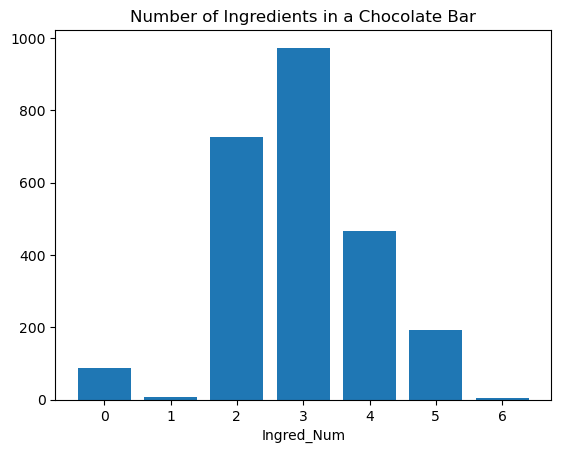

In [468]:
ingred_count = dfchoc['Ingred_Num'].value_counts().sort_index()
bar = plt.bar(ingred_count.index, ingred_count.values)
plt.title('Number of Ingredients in a Chocolate Bar')
plt.xlabel('Ingred_Num')
#plt.bar_label(bar, ingred_count.values)
plt.show()

### Which Ingredients Are Used Most Often?

Write a function **`ingred_in_bar(entry, ingred)`** that takes an entry from the `Ingredients` column and returns `True` if `ingred` is in the entry and returns `False` otherwise. Assume that in each entry, the number of ingredients is followed by `'-'`, then a comma-delimited list of ingredients.

Examples:<br>
`ingred_in_bar('3-B,C,Sa', 'S')` returns `False`.<br>
`ingred_in_bar('3-B,C,Sa', 'Sa')` returns `True`.<br>
`ingred_in_bar(' ', 'Sa')` returns `False`.

In [471]:
def ingred_in_bar(entry, ingred):
    if entry == ' ':
        return False
    ing = entry.split('-')[1].split(',')
    return ingred in ing

In [472]:
ingred_in_bar('3-B,C,Sa', 'S')

False

In [473]:
ingred_in_bar('3-B,C,Sa', 'Sa')

True

In [474]:
ingred_in_bar(' ', 'Sa')

False

**Calculate the frequency of each ingredient and display the results in a bar chart.** Use `plt.text()` to display the counts above the bars. 

*Hint:* You can use `.apply(ingred_in_bar, ingred='B')` on `Ingredients` to determine which bars contain `B` as an ingredient.

<img src="http://www.coloradomath.org/python/ingredients.jpg" width="610" height="265" />

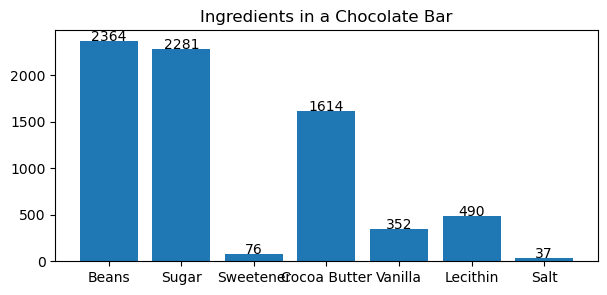

In [476]:
ingredients_list = ['B', 'S', 'S*', 'C', 'V', 'L', 'Sa']

plt.figure(figsize=(7, 3))
ingredient_counts = {ingred: dfchoc['Ingredients'].apply(ingred_in_bar, ingred=ingred).sum() for ingred in ingredients_list}
plt.bar(ingredient_counts.keys(), ingredient_counts.values())

for i, count in enumerate(ingredient_counts.values()):
    plt.text(i, count, str(count), ha='center')

plt.title('Ingredients in a Chocolate Bar')
plt.xticks(ingredients_list, ['Beans', 'Sugar', 'Sweetener', 'Cocoa Butter', 'Vanilla', 'Lecithin', 'Salt'])
plt.show()

### Cocoa Percentage

**Create a box plot** showing the distribution of `Cocoa_Pct` among all bars.

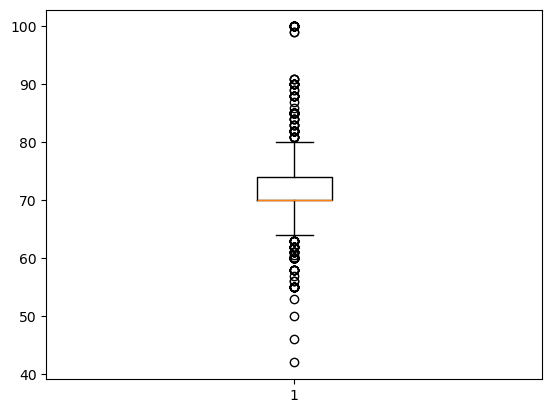

In [478]:
plt.boxplot(dfchoc.Cocoa_Pct)
plt.show()

**Create a box plot** showing the average `Cocoa_Pct`, grouped by manufacturer `Location`. Note the outliers.

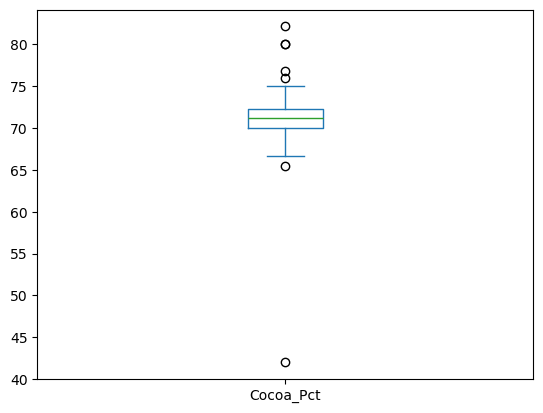

In [480]:
dfchoc.groupby('Location').Cocoa_Pct.mean().plot(kind = 'box')
plt.show()

Write code to find these values and store in the following variables:
* **`min_cocoa_location`**: the name of the country in `Location` with the lowest average cocoa percentage
* **`max_rating_location`**: the name of the country in `Location` with the highest average rating

In [482]:
min_cocoa_location = dfchoc.groupby('Location').Cocoa_Pct.mean().idxmin()
max_rating_location = dfchoc.groupby('Location').Rating.mean().idxmax()

### Darkness Category
**Create a new column called `Dark_Cat`** that indicates how dark each bar is: `not dark`, `dark`, `darker`, or `darkest` based on `Cocoa_Pct`:

|Darkness|Cocoa_Pct|  
|:--:|:--:|  
|`not dark` | `pct` $\le 50$|  
|`dark` | $50<$ `pct` $\le 70$|  
|`darker` | $70<$ `pct` $\le 80$|  
|`darkest` | $80<$ `pct` $\le 100$|  

*Hint:* You may use `pd.cut(data, bins, labels)` or `.apply()`.

In [484]:
def dark(pct):
    if pct <= 50:
        return 'not dark'
    if 50 < pct <= 70:
        return 'dark'
    if 70 < pct <= 80:
        return 'darker'
    elif 80 < pct <= 100:
        return 'darkest'

dfchoc['Dark_Cat'] = dfchoc.Cocoa_Pct.apply(dark)

### Rating Bins
**Create a new column called `Rating_Bin`** that assigns each bar to a bin: 1.5, 2.0, 2.5, 3.0, 3.5, 4.0 based on its `Rating`:

|Rating_Bin|Rating|  
|:--:|:--:|  
|1.5 | `Rating` $\le 1.5$|  
|2.0 | $1.5<$ `Rating` $\le 2.0$|  
|2.5 | $2.0<$ `Rating` $\le 2.5$|  
|... | ...|  
|4.0 | $3.5<$ `Rating` $\le 4.0$|  

etc.

*Hint:* You may use `pd.cut(data, bins, labels)` or `.apply()`.

In [486]:
def rating(rate):
    if rate <= 1.5:
        return 1.5
    if 1.5 < rate <= 2.0:
        return 2.0
    if 2.0 < rate <= 2.5:
        return 2.5
    if 2.5 < rate <= 3.0:
        return 3.0
    if 3.0 < rate <= 3.5:
        return 3.5
    if 3.5 < rate <= 4.0:
        return 4.0

dfchoc['Rating_Bin'] = dfchoc.Rating.apply(rating)

### Chocolate Bar Count by Rating and Darkness Category
We can count the number of chocolate bars in each rating bin and separate by darkness category. **Create a bar chart** that shows these counts, omitting the `not dark` bars. Each darkness category should be displayed in a different color. Your plot should include a title and a legend. Otherwise it is not necessary to exactly match the appearance of the sample plot shown. 

Note: The chart below shows the counts only for the `darker` bars. Your plot should display all the counts.

**Important:** You may call `plt.bar_label()` to display the counts, however the`.py` file submitted to the autograder must have `bar_label` calls commented out.

<img src="http://www.coloradomath.org/python/darkness_bar_cts.jpg" />

In [488]:
dfchoc[dfchoc.Dark_Cat == 'darkest'].Rating_Bin.value_counts().sort_index()

Rating_Bin
1.5     7
2.0    11
2.5    13
3.0    46
3.5    39
4.0     3
Name: count, dtype: int64

In [489]:
# dfchoc = dfchoc[dfchoc['Dark_Cat'] != 'not dark']

# rating_bin = np.linspace(1.5, 4, 6)
# colors = ['peru', 'sienna', 'saddlebrown']

# for index, cat in enumerate(['dark','darker','darkest']):
#     bar = plt.bar(rating_bin + (index-1)*0.1, dfchoc[dfchoc.Dark_Cat == cat].Rating_Bin.value_counts().sort_index(), width = 0.1, 
#                   color = colors[index], label = cat)
#     plt.bar_label(bar)

# plt.title('Bar Count for Each Rating Binby Darkness Category')
# plt.ylim(0, 700)
# plt.legend()
# plt.show()

---

# Option 2: NBA Stats
**Upload two files** to Gradescope:
* `HW13nba.py`
* `HW13nba.ipynb`

* **Read in the file** `'nba-stats-2008-2017.csv'` as a pandas dataframe called **`dfnba`**. This file from [Kaggle](https://www.kaggle.com/drgilermo/nba-players-stats) contains statistics for NBA players in the 2007-08 to 2016-17 seasons. An explanation of the column headings can be found at [basketball-reference.com](https://www.basketball-reference.com/about/glossary.html).

* There are two blank columns in the file. **Remove the blank columns** by calling 
```
dfnba.dropna(axis='columns', how='all', inplace=True)
```

* **Change the data type** of the `Year` column to `'category'`.

Write a function called **`nba_leader_by_year(df, cat, maxmin)`** that returns the names of the players who were at the top (or bottom) of a category in each year. The arguments are
* `df` is a dataframe (`dfnba` or a subset of it).
* `cat` is one of the column headings of `dfnba`.
* `maxmin` is an optional argument that equals `'max'` or `'min'`, corresponding to the top or bottom of the category, respectively. By default the argument equals `'max'`. 

Consider only players who played **at least 40 games in a year**. The return value is **a list of 3-element tuples `(year, value, players)`** corresponding to
* each `year` in 2008-2017
* the max or min category `value`
* a sorted list of `players` who attained the max or min value. 

Examples: (The category values need not appear exactly as shown below.)
* `nba_leader_by_year(dfnba, 'TOV')` returns the players who made the most turnovers in each year.
```
[(2008, 295, ['Steve Nash']),
 (2009, 274, ['Russell Westbrook']),
 (2010, 295, ['Steve Nash']),
 (2011, 316, ['Russell Westbrook']),
 (2012, 255, ['John Wall']),
 (2013, 295, ['James Harden']),
 (2014, 295, ['John Wall']),
 (2015, 321, ['James Harden']),
 (2016, 374, ['James Harden']),
 (2017, 464, ['James Harden'])]
 ```

* `nba_leader_by_year(dfnba[dfnba.Tm == 'DEN'], 'Age', 'min')` returns the youngest Denver Nuggets in each year.
```
[(2008, 22, ['J.R. Smith']),
 (2009, 23, ['J.R. Smith']),
 (2010, 22, ['Ty Lawson']),
 (2011, 23, ['Ty Lawson']),
 (2012, 22, ['Kenneth Faried', 'Kosta Koufos']),
 (2013, 22, ['Jordan Hamilton']),
 (2014, 21, ['Evan Fournier', 'Quincy Miller']),
 (2015, 20, ['Gary Harris', 'Jusuf Nurkic']),
 (2016, 19, ['Emmanuel Mudiay']),
 (2017, 19, ['Jamal Murray'])]
```

### Which division is better: West or East?

* First **remove** from `dfnba` the players who played for more than one team in a single year. Their `Tm` is listed as `TOT`. (*Hint:* After removing, if you wish to access the row index numbers, call `dfnba.reset_index(inplace=True)` to renumber the rows.)
* Next **add a column** `DIV` that indicates whether each team is `'West'` or `'East'`. The Western division teams are
```
['DAL', 'DEN', 'GSW', 'HOU', 'LAC', 'LAL', 'MEM', 'MIN', 'NOP', 'OKC', 'PHX', 'POR', 'SAC', 'SAS', 'UTA']
```
The rest are Eastern division teams. (Note: A few teams have changed names over the years. Old team names have been replaced by the current name.)

* Write a function **`east_west_top_team(df, cat, maxmin)`** that identifies the team in each division (East and West) that had the most (or least) total sum in a category. The function returns a list of two two-element tuples `(team, cat_sum)`, corresponding to the East and West results, respectively, where
  * `team` is the team name in the division that had the max or min category sum. (If more than one team matches, return any of the names.)
  * `cat_sum` equals the max (or min) category sum.

Examples:<br>
`east_west_top_team(dfnba, '3P')` returns 
```
[('NYK', 6862), ('HOU', 7643)]
```

`east_west_top_team(dfnba[dfnba.Year == 2017], 'PTS', 'min')` returns
```
[('ORL', 8288), ('DAL', 8029)]
```

* Write a function **`east_west_top_players(df, cat)`** that returns a list containing two sublists (one for each division) of the top player in a given category for each year in `df`. (If more than one player matches, return any of the top player names.) Consider only players who played at least 40 games in a year.

Examples:<br>
`east_west_top_players(dfnba, 'PTS')` returns
```
[[('LeBron James', 2250),
  ('Dwyane Wade', 2386),
  ('LeBron James', 2258),
  ('LeBron James', 2111),
  ('LeBron James', 1683),
  ('LeBron James', 2036),
  ('Carmelo Anthony', 2112),
  ('LeBron James', 1743),
  ('LeBron James', 1920),
  ('Isaiah Thomas', 2199)],
 [('Kobe Bryant', 2323),
  ('Kobe Bryant', 2201),
  ('Kevin Durant', 2472),
  ('Kevin Durant', 2161),
  ('Kevin Durant', 1850),
  ('Kevin Durant', 2280),
  ('Kevin Durant', 2593),
  ('James Harden', 2217),
  ('James Harden', 2376),
  ('Russell Westbrook', 2558)]]
```

`east_west_top_players(dfnba[dfnba.Year == 2016], '3P')` returns
```
[[('Kyle Lowry', 212)], [('Stephen Curry', 402)]]
```

Write a function **`east_west_top_players_plot(df, cat)`** that calls `east_west_top_players()` for a given category and plots the results, including the player names. 

Call `east_west_top_players_plot(dfnba, 'PTS')`. The result should look similar to the following plot. It need not exactly match in appearance.

<img src="http://www.coloradomath.org/python/east-west-pts.png" />

Call `east_west_top_players_plot(dfnba, 'BLK')`.

<img src="http://www.coloradomath.org/python/east-west-blk.png" />